<a href="https://colab.research.google.com/github/vijeta-chaudhary/Daily-Coding-Problem-Solutions/blob/master/Netflix_Data_Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import t,norm,chi2,chi2_contingency,chisquare
import matplotlib
from matplotlib import pyplot as plt
import pylab
import statsmodels.api as sm
from statsmodels. formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df= pd.read_csv("/content/NetflixOriginals.csv",encoding="latin-1")
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


**Question-1**

In [ ]:
df1=df[df['Runtime']>120]
df1.reset_index(inplace=True)
df1[['Language','Runtime']].head()

,Language,Runtime
0,Hindi,147
1,English,149
2,Hindi,139
3,Hindi,144
4,English,131


**Question-2**

In [ ]:
df['Premiere']=pd.to_datetime(df['Premiere'])
df['Premiere'].head()

0   2019-08-05
1   2020-08-21
2   2019-12-26
3   2018-01-19
4   2020-10-30
Name: Premiere, dtype: datetime64[ns]

In [ ]:
df2=df[(df['Genre']=='Documentary')&(df['Premiere']>'2019-01-01')&(df['Premiere']<'2020-06-01')]
df2.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English


**Question-3**

In [ ]:
df3=df[(df['Genre']==df['Genre'].max())&(df['Language']=='English')]
df3.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English


**Question-4**

In [ ]:
df4 = df[df['Language'].isin(['Hindi'])]
#df4['Runtime'].mean()
np.mean(df4['Runtime'])

115.78787878787878

**Question-5**

In [ ]:
df5=df['Genre'].value_counts()
df5.head()
# here value_counts is already counting the unique values of genre so we don't have to write unique

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Name: Genre, dtype: int64

**Question-6**

In [ ]:
df6=df['Language'].value_counts().head(3)
df6

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

**Question-7**

In [ ]:
df7= df.sort_values(by='IMDB Score', ascending=False)
top = df7.head(10)
top[['Title','IMDB Score']]

,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
578,Ben Platt: Live from Radio City Music Hall,8.4
577,Dancing with the Birds,8.3
576,Cuba and the Cameraman,8.3
573,Klaus,8.2
571,13th,8.2


**Question-8**

In [ ]:
df8=df['IMDB Score'].corr(df['Runtime'])
df8

-0.04089629142078858

**Question-9**

In [ ]:
df9= df.sort_values(by='IMDB Score', ascending=False)
top = df9.head(10)
top[['Genre','IMDB Score']]

,Genre,IMDB Score
583,Documentary,9.0
582,Documentary,8.6
581,One-man show,8.5
580,Documentary,8.4
579,Concert Film,8.4
578,Concert Film,8.4
577,Documentary,8.3
576,Documentary,8.3
573,Animation/Christmas/Comedy/Adventure,8.2
571,Documentary,8.2


**Question-10**

In [ ]:
df10= df.sort_values(by='Runtime', ascending=False)
top = df10.head(10)
top[['Title','Runtime']]

,Title,Runtime
561,The Irishman,209
328,Da 5 Bloods,155
581,Springsteen on Broadway,153
247,Citation,151
284,The Forest of Love,151
509,Raat Akeli Hai,149
7,The Last Days of American Crime,149
543,Ludo,149
194,Army of the Dead,148
5,Drive,147


**Question-11**

In [ ]:
df11=df['Premiere'].dt.year
top=df11.value_counts()
top.head(10)


2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Premiere, dtype: int64

**Question-12**

In [ ]:
low_avg_lang = df.groupby('Language')['IMDB Score'].mean().idxmin()
low_avg_lang

'Malay'

**Question-13**

In [ ]:
df['year_of_netflix'] = df['Premiere'].dt.year
average_runtimes = df.groupby(['year_of_netflix'])['Runtime'].mean().idxmax()
average_runtimes


2021

**Question-14**

In [ ]:
genre_most_used_per_language = df.groupby('Language')['Genre'].value_counts().groupby('Language').idxmax().reset_index(name='MostUsedGenre')
genre_most_used_per_language

,Language,MostUsedGenre
0,Bengali,"(Bengali, Documentary)"
1,Dutch,"(Dutch, Crime drama)"
2,English,"(English, Documentary)"
3,English/Akan,"(English/Akan, War drama)"
4,English/Arabic,"(English/Arabic, Documentary)"
5,English/Hindi,"(English/Hindi, Documentary)"
6,English/Japanese,"(English/Japanese, Crime drama)"
7,English/Korean,"(English/Korean, Action-adventure)"
8,English/Mandarin,"(English/Mandarin, Documentary)"
9,English/Russian,"(English/Russian, Documentary)"


**Question-15**

In [ ]:
Q1 = df['Runtime'].quantile(0.25)
Q3 = df['Runtime'].quantile(0.75)
IQR = Q3 - Q1

outliers_runtime = df[(df['Runtime'] < Q1 - 1.5 * IQR) | (df['Runtime'] > Q3 + 1.5 * IQR)]
outliers_runtime

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year_of_netflix
5,Drive,Action,2019-11-01,147,3.5,Hindi,2019
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English,2020
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish,2019
16,Ghost Stories,Horror anthology,2020-01-01,144,4.3,Hindi,2020
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish,2019
...,...,...,...,...,...,...,...
552,Anima,Musical / Short,2019-06-27,15,7.7,English,2019
560,If Anything Happens I Love You,Animation / Short,2020-11-20,12,7.8,English,2020
561,The Irishman,Crime drama,2019-11-27,209,7.8,English,2019
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English,2019


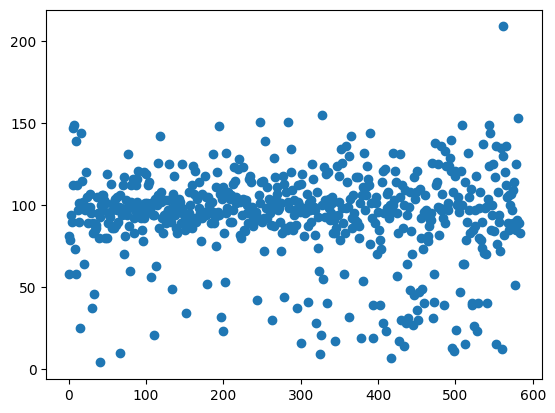

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.index, df['Runtime'])
# to see the outliers we use scatter plot for the visual representation